# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
df=pd.read_csv('tumor.csv')
df.head(10)

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
df.dtypes


ID                              int64
ClumpThickness                  int64
Cell_Size                       int64
Cell_Shape                      int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Normal_Nucleoli                 int64
Bland_Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [6]:
len(df[df.Bare_Nuclei=='?'])

16

In [7]:
# We could see "?" values in column, this should be removed from data set
df.Bare_Nuclei.replace('?',np.NAN,inplace=True)
df.Bare_Nuclei.fillna(0,inplace=True)
# Check for missing value in any other column
#df.Bare_Nuclei.min

In [8]:
df.Bare_Nuclei=df.Bare_Nuclei.astype('int64')

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column
df.Bare_Nuclei.replace(0,df.Bare_Nuclei.mean(),inplace=True)
# Get count of rows having ?


In [10]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [11]:
# Check for correlation of variable
df.describe()

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

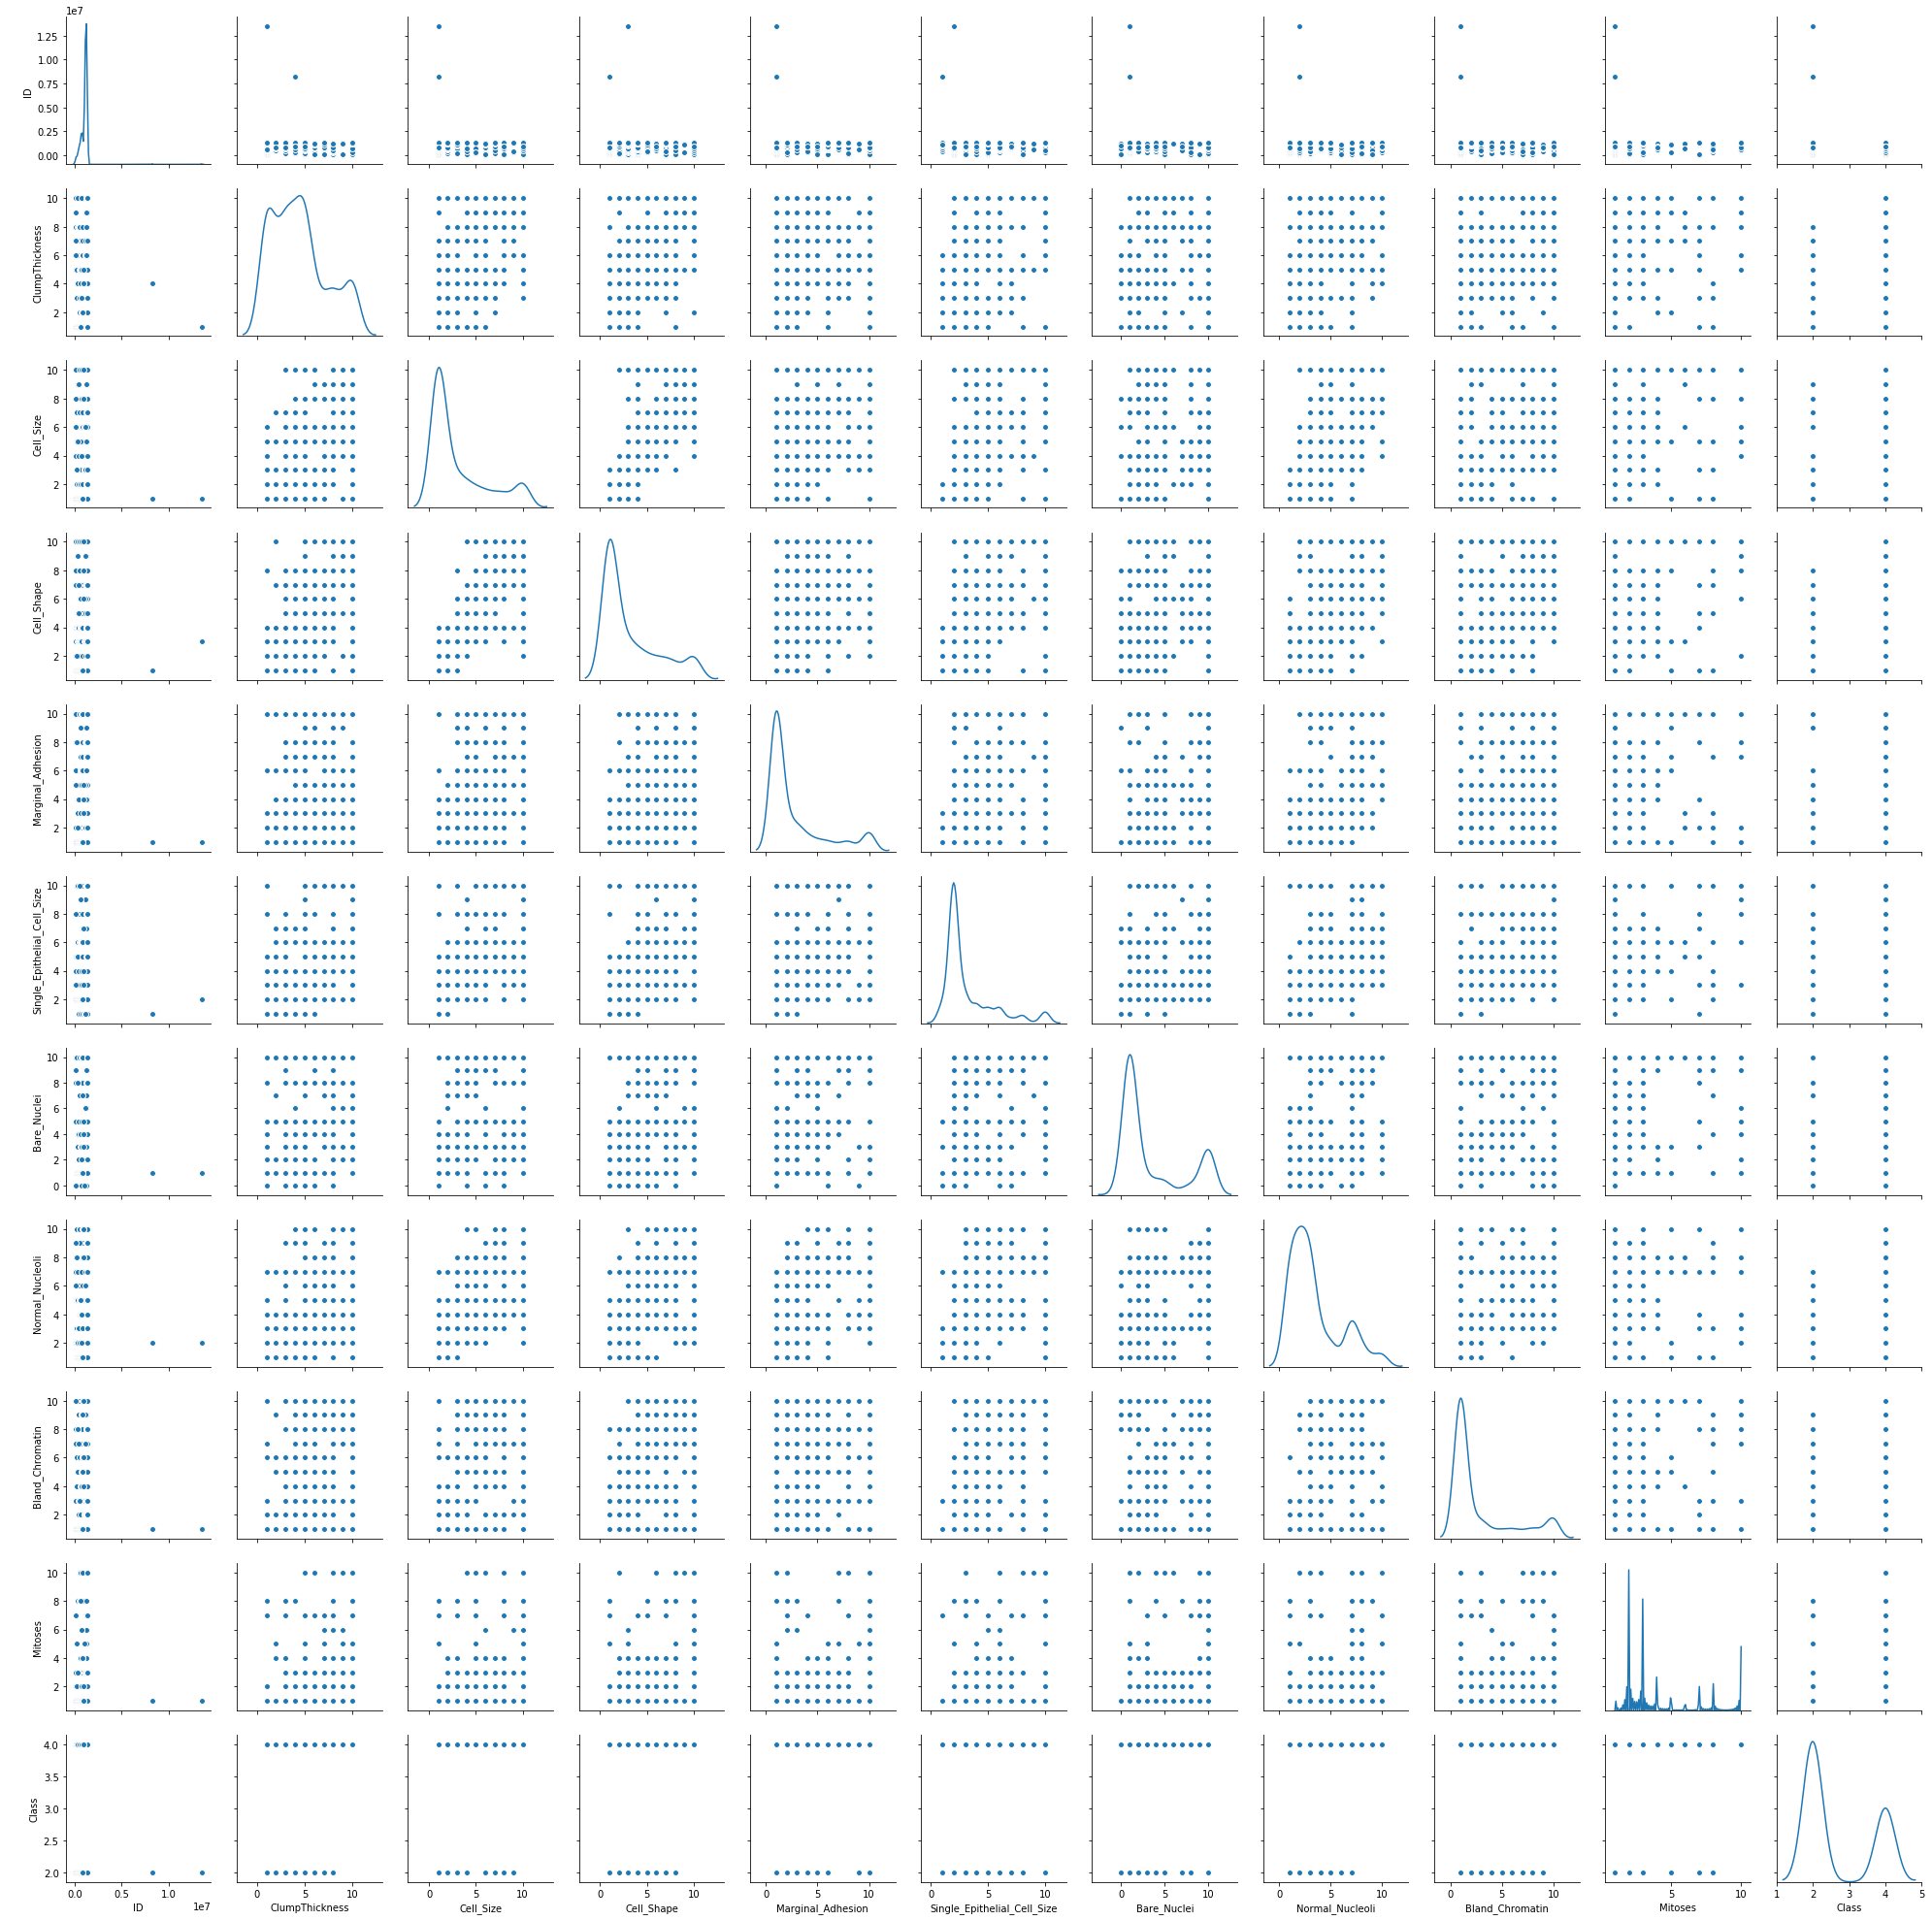

In [13]:
#Let us check for pair plots
sns.pairplot(df,diag_kind='kde');

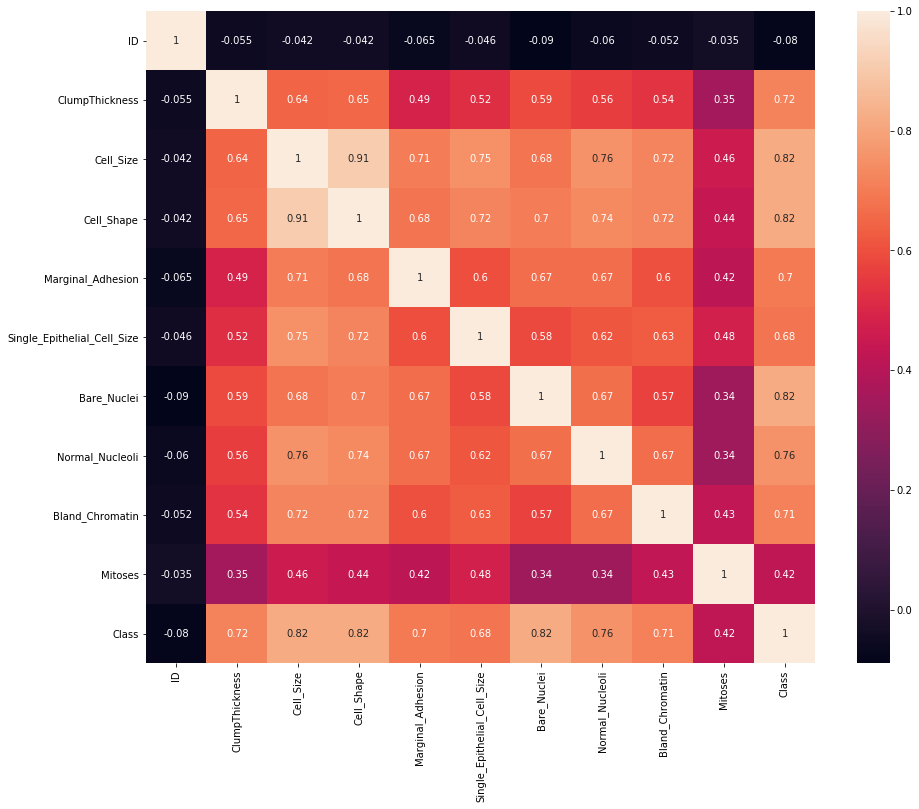

In [14]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

plt.figure(figsize=(15, 12))

df_corr = df.corr()
sns.heatmap(df_corr,
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [15]:
# We could see most of the outliers are now removed.

In [16]:
#Since ID of the patient is not realted to the model we can remove them
df_fea=df.drop(['ID','Class'],axis=1)
df_fea.shape

(699, 9)

In [17]:
from sklearn import preprocessing
names = df_fea.columns
scaler = preprocessing.StandardScaler()

In [18]:
scaled_df = scaler.fit_transform(df_fea)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.677144,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.796673,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.402275,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.147462,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.677144,-0.179662,-0.611825,-0.343912


In [19]:
df_fea

,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


# Q6 Create a covariance matrix for identifying Principal components

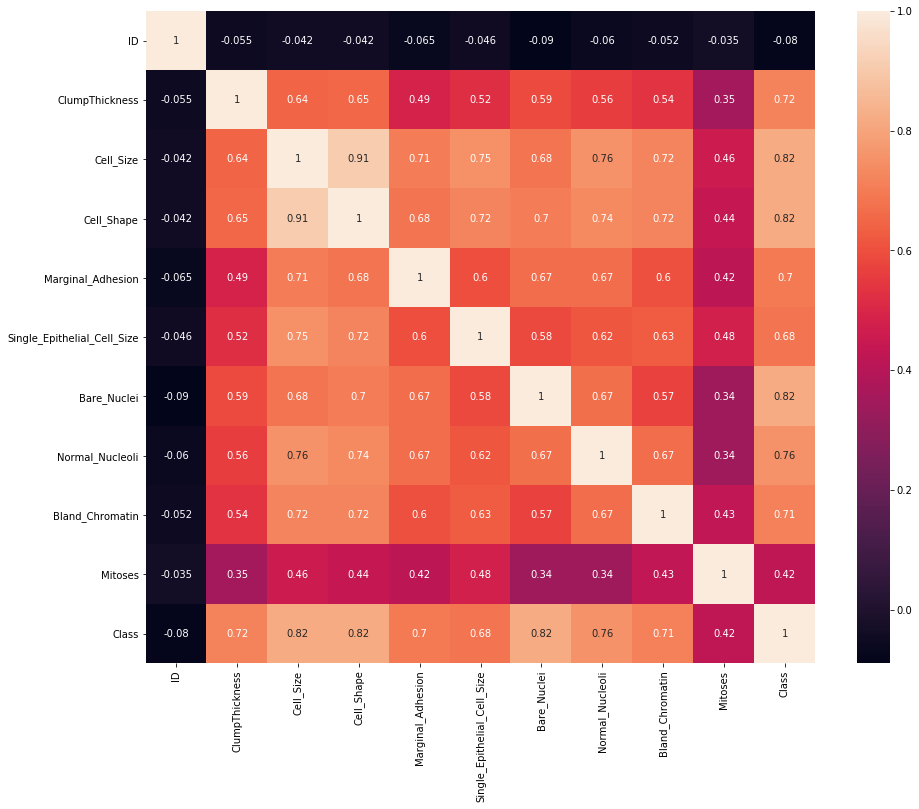

In [20]:
# PCA
# Step 1 - Create covariance matrix
plt.figure(figsize=(15, 12))

df_corr1 = df_fea.corr()
sns.heatmap(df_corr,
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

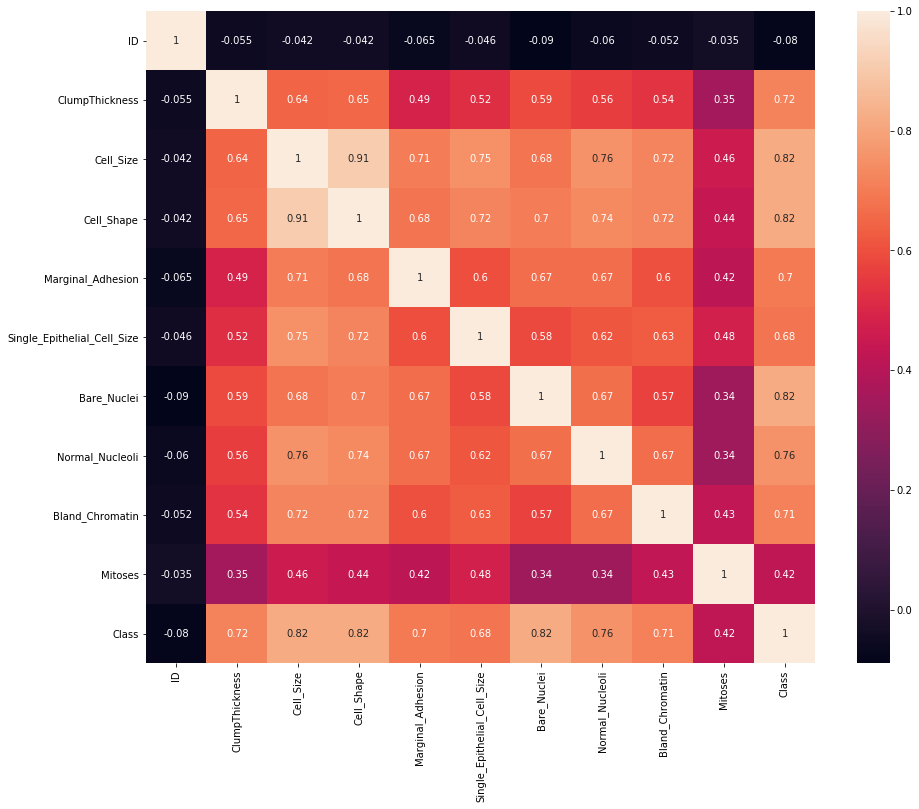

In [21]:
plt.figure(figsize=(15, 12))

df_corr2 = scaled_df.corr()
sns.heatmap(df_corr,
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

In [22]:
df_fea.shape

(699, 9)

In [23]:
df_cov=np.cov(df_fea.T)
df_cov


array([[ 7.92839546,  5.541164  ,  5.47769019,  3.91030781,  3.25346893,
         6.04104923,  3.83405684,  4.60723465,  1.69038864],
       [ 5.541164  ,  9.3114027 ,  8.22421306,  6.14778583,  5.07979061,
         7.6051994 ,  5.62299396,  6.73568258,  2.4005661 ],
       [ 5.47769019,  8.22421306,  8.8322655 ,  5.79656775,  4.73592648,
         7.62290788,  5.33312837,  6.52907141,  2.23715623],
       [ 3.91030781,  6.14778583,  5.79656775,  8.1531906 ,  3.7910646 ,
         6.92059471,  4.64197523,  5.26080032,  2.04523039],
       [ 3.25346893,  5.07979061,  4.73592648,  3.7910646 ,  4.90312399,
         4.6991527 ,  3.32649999,  4.25227812,  1.81948219],
       [ 6.04104923,  7.6051994 ,  7.62290788,  6.92059471,  4.6991527 ,
        13.25475608,  5.96155171,  6.35975257,  2.14044419],
       [ 3.83405684,  5.62299396,  5.33312837,  4.64197523,  3.32649999,
         5.96155171,  5.94562023,  4.95804075,  1.43931158],
       [ 4.60723465,  6.73568258,  6.52907141,  5.26080032,  4

# Q7 Identify eigen values and eigen vector

In [24]:
# Step 2- Get eigen values and eigen vector

In [98]:
eig_val, eig_vec = np.linalg.eig(df_cov)
eig_val.shape
eig_vec.shape
print('Eigen Values', eig_val)
print('Eigen Vector', eig_vec)

Eigen Values [48.60201413  5.24222919  4.28575413  0.80367251  3.10203207  2.73418265
  2.45440012  1.59392599  1.77671606]
Eigen Vector [[-0.29819499  0.05766947  0.84870182 -0.00533518  0.06573366 -0.41063677
   0.07278925  0.09209113  0.02661232]
 [-0.4040269  -0.22810718  0.02498576 -0.72757052  0.28498937  0.34479741
   0.09115832 -0.12525454 -0.17505284]
 [-0.39182959 -0.16810879  0.07511076  0.66690624  0.20040805  0.38022664
   0.09534423 -0.24182325 -0.33985108]
 [-0.33137834  0.09479829 -0.48294017  0.0422766   0.3989845  -0.63743749
   0.1801199   0.10674145 -0.19191419]
 [-0.24985997 -0.1812882  -0.04989646  0.11570905  0.19438837  0.19737744
  -0.40749343  0.75400483  0.27840165]
 [-0.44128662  0.79035527 -0.08249455 -0.05681657 -0.30328274  0.16727876
  -0.21804213 -0.01691464 -0.0527267 ]
 [-0.29184301 -0.01969062 -0.10797409  0.08149327 -0.04167154  0.07682546
   0.47623491 -0.16703756  0.79611587]
 [-0.35618966 -0.47402649 -0.13400002 -0.0252427  -0.74886113 -0.2067396

# Q8 Find variance and cumulative variance by each eigen vector

In [100]:
i=0

In [101]:
for i in range(len(eig_val)):
    print('Variance of', eig_val[i], 'is' ,(eig_val[i])/eig_val.sum())

Variance of 48.602014129781914 is 0.6884632692233994
Variance of 5.242229194812929 is 0.07425787416632423
Variance of 4.285754131970007 is 0.0607090951602298
Variance of 0.8036725101378737 is 0.01138428136408138
Variance of 3.102032065070221 is 0.04394128875094091
Variance of 2.7341826469810573 is 0.03873058262087528
Variance of 2.4544001165885683 is 0.03476737247424936
Variance of 1.5939259923502707 is 0.022578477852035934
Variance of 1.776716062371331 is 0.025167758387863757


In [102]:
x=0
for a in range(len(eig_val)):
    x += (eig_val[a]/eig_val.sum())
    print('Cumulative Variance of', [a], 'is' ,x)

Cumulative Variance of [0] is 0.6884632692233994
Cumulative Variance of [1] is 0.7627211433897236
Cumulative Variance of [2] is 0.8234302385499535
Cumulative Variance of [3] is 0.8348145199140349
Cumulative Variance of [4] is 0.8787558086649758
Cumulative Variance of [5] is 0.9174863912858511
Cumulative Variance of [6] is 0.9522537637601004
Cumulative Variance of [7] is 0.9748322416121363
Cumulative Variance of [8] is 1.0


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [103]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA(n_components=3)
pca.fit(df_fea)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [115]:
X_pca = pca.transform(df_fea)

In [116]:
pca.explained_variance_

array([48.60201413,  5.24222919,  4.28575413])

In [117]:
pca.components_

array([[ 0.29819499,  0.4040269 ,  0.39182959,  0.33137834,  0.24985997,
         0.44128662,  0.29184301,  0.35618966,  0.12366355],
       [-0.05766947,  0.22810718,  0.16810879, -0.09479829,  0.1812882 ,
        -0.79035527,  0.01969062,  0.47402649,  0.15741143],
       [-0.84870182, -0.02498576, -0.07511076,  0.48294017,  0.04989646,
         0.08249455,  0.10797409,  0.13400002,  0.03603711]])

In [118]:
pca_features = pca.transform(df_fea)
pca_features

array([[-4.40904732,  0.01994907, -1.73022234],
       [ 4.88110465, -4.90332617,  1.02718206],
       [-4.56415067, -0.65506726,  0.04967586],
       ...,
       [10.33687644,  7.24412961,  0.53116848],
       [ 6.47179821,  2.54870704,  1.74004474],
       [ 7.56560301,  1.23300626,  1.93715437]])

In [119]:
pca.explained_variance_ratio_

array([0.68846327, 0.07425787, 0.0607091 ])

# Q10 Find correlation between components and features

In [121]:
pca_df= pd.DataFrame(pca_features,columns=['PC1','PC2','PC3'])

In [123]:
pca_comp_df= pd.DataFrame(pca.components_,columns=df_fea.columns)

In [124]:
pca_comp_df.corr()

,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses
ClumpThickness,1.000000,0.993715,0.981710,-0.454152,0.999344,0.071416,0.486436,0.792333,0.836105
Cell_Size,0.993715,1.000000,0.996851,-0.351571,0.997118,0.182618,0.581179,0.719062,0.769446
Cell_Shape,0.981710,0.996851,1.000000,-0.276228,0.987962,0.260008,0.643880,0.661690,0.716374
Marginal_Adhesion,-0.454152,-0.351571,-0.276228,1.000000,-0.421583,0.856216,0.557500,-0.903383,-0.868452
Single_Epithelial_Cell_Size,0.999344,0.997118,0.987962,-0.421583,1.000000,0.107499,0.517764,0.769714,0.815687
Bare_Nuclei,0.071416,0.182618,0.260008,0.856216,0.107499,1.000000,0.906225,-0.551946,-0.487457
Normal_Nucleoli,0.486436,0.581179,0.643880,0.557500,0.517764,0.906225,1.000000,-0.147626,-0.072582
Bland_Chromatin,0.792333,0.719062,0.661690,-0.903383,0.769714,-0.551946,-0.147626,1.000000,0.997150
Mitoses,0.836105,0.769446,0.716374,-0.868452,0.815687,-0.487457,-0.072582,0.997150,1.000000


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [79]:
joke=pd.read_excel('jokes.xlsx')
joke.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [80]:
ratings=joke.iloc[0:200,1:]

In [81]:
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [87]:
ratings.columns=np.array(range(0,100))

In [88]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [92]:
ratings.replace(99,0,inplace=True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [93]:
from sklearn import preprocessing
names = ratings.columns
scaler = preprocessing.StandardScaler()

In [94]:
scaled_df = scaler.fit_transform(ratings)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [129]:
rating_mean=scaled_df.mean()
rating_mean

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
          ...     
70    7.632783e-19
71   -9.325873e-17
72   -4.024558e-17
73    7.743806e-17
74    1.290634e-17
75    3.885781e-17
76    3.747003e-18
77   -2.886580e-17
78   -9.853229e-18
79   -6.938894e-17
80    3.941292e-17
81    1.243450e-16
82    0.000000e+00
83    2.498002e-17
84   -2.045586e-16
85   -1.290634e-17
86   -8.465451e-17
87    5.107026e-17
88    2.997602e-17
89   -6.369905e-17
90   -4.385381e-17
91   -3.4972

In [132]:
rating_mean.idxmax()

98

In [131]:
rating_mean.nlargest(n=10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64